<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span><ul class="toc-item"><li><span><a href="#Model-Introduction" data-toc-modified-id="Model-Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model Introduction</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Train-Validation-Split" data-toc-modified-id="Train-Validation-Split-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train-Validation Split</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#Modelling-xgboost" data-toc-modified-id="Modelling-xgboost-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling xgboost</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Xgboost-using-DMatrix" data-toc-modified-id="Xgboost-using-DMatrix-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Xgboost using DMatrix</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Modelling-xgboost-using-dtrain" data-toc-modified-id="Modelling-xgboost-using-dtrain-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Modelling xgboost using dtrain</a></span></li></ul></li><li><span><a href="#Model-Evaluation-Using-shap" data-toc-modified-id="Model-Evaluation-Using-shap-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Evaluation Using shap</a></span></li><li><span><a href="#HPO-(Hyper-Parameter-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameter-Optimization)-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>HPO (Hyper Parameter Optimization)</a></span></li><li><span><a href="#HPO-Model-Complexity" data-toc-modified-id="HPO-Model-Complexity-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>HPO Model Complexity</a></span></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Best Model</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Estimate the price based on given features.

![](images/data_description.png)

## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Notes
- If we do log transform of target variable `np.log1p`, 
  we need to do the inverse log transform `np.expm1` before model evaluation
  e.g. rmse, r2 etc

# Imports

In [1]:
import time
time_start_notebook = time.time()

In [2]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    #!pip install hpsklearn
    !pip install shap

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

In [74]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
sns.set(color_codes=True)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# random state
SEED=100
np.random.seed(SEED) # we need this in each cell

# mixed
import os
import time
import scipy
import six
import pickle
import joblib

# sklearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# special
import xgboost as xgb
from xgboost import XGBRegressor

# model evaluation using snap
import shap
# shap_values = shap.TreeExplainer(model_xgb).shap_values(Xtest)
# shap.summary_plot(shap_values, Xtest)
# shap.dependence_plot("column_name", shap_values, Xtest)

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Bhishan Poudel 2020-11-02 

CPython 3.7.7
IPython 7.18.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

shap       0.35.0
six        1.15.0
xgboost    1.2.0
matplotlib 3.2.1
sklearn    0.23.1
watermark  2.0.2
numpy      1.18.4
seaborn    0.11.0
scipy      1.4.1
joblib     0.17.0
pandas     1.1.0



# Important Scripts

In [4]:
df_eval = pd.DataFrame({'Model': [],
                        'Details':[],
                        'Train Neg MSE K-Fold Cross Validation':[],
                        'Test RMSE':[],
                        'Test Explained Variance Score':[],
                        'Test R-squared':[],
                        'Test Adjusted R-squared':[],
                        })

In [5]:
def show_methods(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [6]:
def adjustedR2(rsquared,nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [7]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

# Feature selection

In [8]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

cols_drop = ['id','date']
df = df.drop(cols_drop,axis=1)

dict_features = dict(enumerate(features_raw_all))
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


# Log transform large values

In [9]:
log_cols = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in log_cols:
    df[col] = np.log1p(df[col].to_numpy())

# Train-Test split after log transform

In [10]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split (X,y,
                                                 test_size=0.20,
                                                 random_state=SEED)

df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=features_raw_all)
df_Xtest = pd.DataFrame(Xtest, columns=features_raw_all)

Xtrain_orig.shape, ytrain_orig.shape, Xtest.shape, ytest.shape, Xtrain_orig[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Train-Validation Split

In [11]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_orig, ytrain_orig,
                                                  random_state=SEED, test_size=0.2)

df_Xtrain = pd.DataFrame(Xtrain, columns=features_raw_all)
df_Xvalid = pd.DataFrame(Xvalid, columns=features_raw_all)

# Scaling the Data

In [12]:
scaler = StandardScaler() # standard scaler better for regression
scaler.fit(Xtrain_orig)

Xtrain_orig_scaled = scaler.transform(Xtrain_orig)
Xtest_scaled = scaler.transform(Xtest)

Xtrain_scaled = scaler.transform(Xtrain)
Xvalid_scaled = scaler.transform(Xvalid)

df_Xtrain_orig_scaled = pd.DataFrame(Xtrain_orig_scaled, columns=features_raw_all)
df_Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=features_raw_all)
df_Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=features_raw_all)
df_Xvalid_scaled = pd.DataFrame(Xvalid_scaled, columns=features_raw_all)

Xtrain_scaled[0][:2], Xtest_scaled[0][:2]

(array([1.74976973, 1.15630369]), array([-0.39032991,  0.50625765]))

# Modelling xgboost
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
```python
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100 # number of trees you want to build.
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear even for regression (may also use dart instead of gbtree, but needs to tune)
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0 # A higher value leads to fewer splits.
min_child_weight=1
max_delta_step=0
subsample=1 # percentage of samples used per tree. Low value can lead to underfitting.
colsample_bytree=1 # percentage of features used per tree. High value can lead to overfitting.
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0 # A large value leads to more regularization.
reg_lambda=1 # L2 regularization on leaf weights and is smoother than L1 regularization.
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```

[Early stopping](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  

If you have a validation set, you can use early stopping to find the optimal number of boosting rounds. Early stopping requires at least one set in evals. If there’s more than one, it will use the last.

`train(..., evals=evals, early_stopping_rounds=10)`


The model will train until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training.

If early stopping occurs, the model will have three additional fields: `bst.best_score`, `bst.best_iteration` and `bst.best_ntree_limit`. Note that xgboost.train() will return a model from the last iteration, not the best one.

This works with both metrics to minimize (RMSE, log loss, etc.) and to maximize (MAP, NDCG, AUC). Note that if you specify more than one evaluation metric the last one in param['eval_metric'] is used for early stopping.

If early stopping is enabled during training, you can get predictions from the best iteration with bst.best_ntree_limit:

`ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)`



[Faster implementations](https://github.com/dmlc/xgboost/issues/1950)

Flexible tree growing policies
The existing tree grower in xgboost grows a tree in a depth-wise fashion, executing splits in first level before splits in second and so forth. The new grower lets you control the way new nodes are added to the tree:

grow_policy=depthwise (default): split at nodes closest to the root, i.e. grow depth-wise.
grow_policy=lossguide: split at nodes with highest loss change. This behavior mimics that of LightGBM.
It has been reported that the lossguide policy often results in faster convergence in loss, though there is also risk of over-fitting(see the preliminary results).


In [13]:
import xgboost as xgb

show_methods(xgb)

Object Type: <class 'module'>



0                1               2       3  \
0                Booster     VERSION_FILE  XGBRFRegressor  compat   
1                DMatrix    XGBClassifier       XGBRanker    core   
2  DeviceQuantileDMatrix         XGBModel    XGBRegressor      cv   
3           RabitTracker  XGBRFClassifier        callback    dask   

                 4            5         6  
0                f     plotting   tracker  
1          libpath        rabit     train  
2  plot_importance      sklearn  training  
3        plot_tree  to_graphviz

In [14]:
show_methods(xgb.plotting)

Object Type: <class 'module'>



0        1         2                3          4            5 6
0  Booster  BytesIO  XGBModel  plot_importance  plot_tree  to_graphviz

In [15]:
# help(xgb.XGBRegressor)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest

# fit the model
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror')

model_xgb.fit(Xtr, ytr)

# fitted model
model = model_xgb

# save the model
# joblib.dump(model_xgb, 'model_xgb.pkl')
# model_xgb = joblib.load('model_xgb.pkl')


# ypreds
ypreds = model.predict(Xtx)

# train validation
kf = sklearn.model_selection.KFold(5,shuffle=True,random_state=SEED)
cvs = cross_val_score(model, Xtr, ytr,cv=kf,
                      scoring = "neg_mean_squared_error")
score = cvs.mean() # this is for log target case

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx_back,ypreds_back))

# expalined variance
evs = explained_variance_score(ytx_back, ypreds_back)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

row_eval = ['Xgboost', 
            'default,log+standard scaling',
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
df_eval

Time taken: 0 min 10 secs


Model                       Details  \
0  Xgboost  default,log+standard scaling   

   Train Neg MSE K-Fold Cross Validation      Test RMSE  \
0                              -0.030853  127620.523923   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.880059        0.879149                 0.878672

# Feature Importance

<div class="alert alert-block alert-success">
<b>NOTE:</b> 
    
`model.feature_importance` gives important features based on `information type gain`.

`xgb.plot_feature_importance(model)` gives important features based on `weights`.
</div>



In [17]:
show_methods(model_xgb)

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



0                        1                        2  \
0              apply             evals_result           get_xgb_params   
1         base_score     feature_importances_                   gpu_id   
2            booster                      fit          importance_type   
3              coef_                    gamma  interaction_constraints   
4  colsample_bylevel              get_booster               intercept_   
5   colsample_bynode  get_num_boosting_rounds                   kwargs   
6   colsample_bytree               get_params                            

                  3                     4                 5  \
0     learning_rate  monotone_constraints           predict   
1        load_model          n_estimators      random_state   
2    max_delta_step        n_features_in_         reg_alpha   
3         max_depth                n_jobs        reg_lambda   
4  min_child_weight     num_parallel_tree        save_model   
5           missing             objective  scale_pos_weight   
6                                                             

                     6  
0                score  
1           set_params  
2            subsample  
3          tree_method  
4  validate_parameters  
5            verbosity  
6

In [18]:
# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance_gain': model_xgb.feature_importances_
                       }) 

df_imp.sort_values('Importance_gain').style.background_gradient()

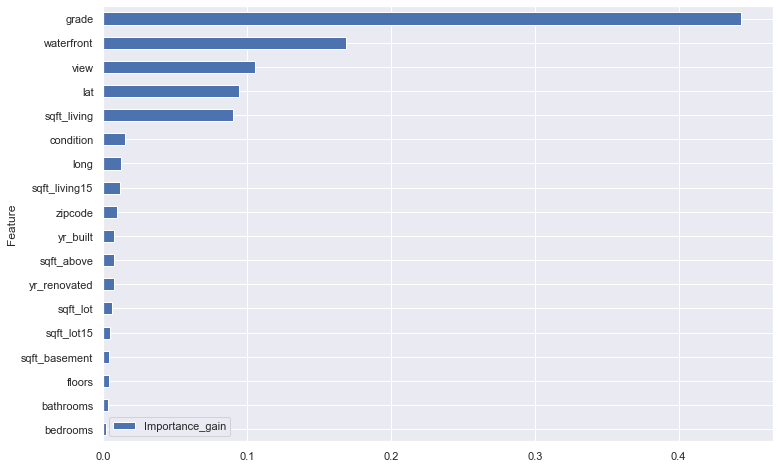

In [19]:
df_imp.sort_values('Importance_gain').set_index('Feature')\
.sort_values('Importance_gain').plot.barh(figsize=(12,8))

In [20]:
help(xgb.plot_importance)

Help on function plot_importance in module xgboost.plotting:

plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', fmap='', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)
    Plot importance based on fitted trees.
    
    Parameters
    ----------
    booster : Booster, XGBModel or dict
        Booster or XGBModel instance, or dict taken by Booster.get_fscore()
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    grid : bool, Turn the axes grids on or off.  Default is True (On).
    importance_type : str, default "weight"
        How the importance is calculated: either "weight", "gain", or "cover"
    
        * "weight" is the number of times a feature appears in a tree
        * "gain" is the average gain of splits which use the feature
        * "cover" is the average coverage of splits which use 

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


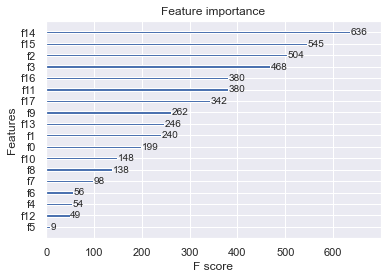

In [21]:
# if we fit model_xgb on numpy array instead of pandas dataframe (or dtrain with feature names)
# we do not have feature names, so default feature names are f1,f2,...
axsub = xgb.plot_importance(model_xgb)
print(features_raw_all)
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


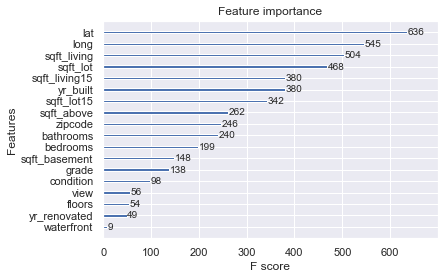

In [22]:
# If we have fitted xgboost on numpy array without feature names
# we can rename the plot yticklabels as shown below:
axsub = xgb.plot_importance(model_xgb)

Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(features_raw_all))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

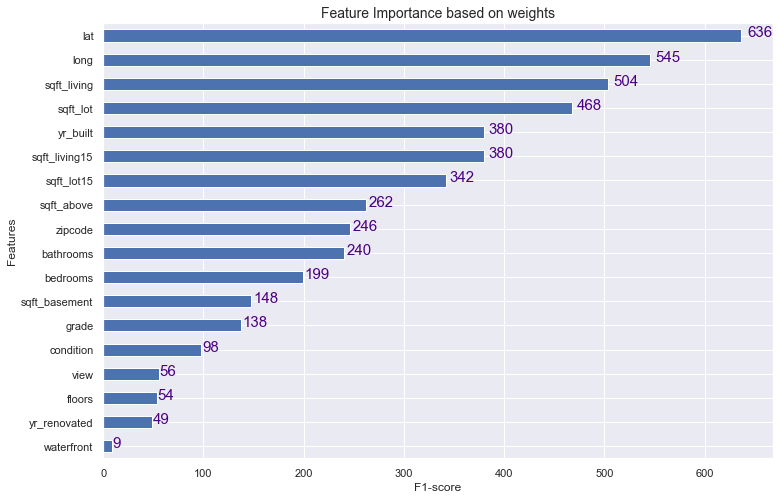

In [23]:
def plot_feature_imp_xgb(model, numpy=False,dict_features=None):
    """Plot the feature importance horizontal bar plot for xgboost model.

    Note:
    ----
    If you have used numpy arrays in xgboost:
    plot_feature_imp_xgb(model_xgb, True, dict_features)

    If you have used pandas dataframes in xgboost:
    plot_feature_imp_xgb(model_xgb)
  
    """

    dict_fimp = model_xgb.get_booster().get_score(importance_type="weight")
  
    # feature importance
    df_imp = pd.DataFrame({'Features': list(dict_fimp.keys()),
                        'Importance_weight': list(dict_fimp.values())
                        }) 

    if numpy:
        assert dict_features is not None

        df_imp['Features'] = df_imp['Features'].str.lstrip('f').astype(int).map(dict_features)


    df_imp = df_imp.sort_values('Importance_weight').set_index('Features')
    ax = df_imp.plot.barh(figsize=(12,8))

    plt.grid(True)
    plt.xlabel('F1-score')
    plt.title('Feature Importance based on weights',fontsize=14)
    ax.get_legend().remove()

    for p in ax.patches:
        x = p.get_width()*1.01
        y = p.get_y()+ 0.2
        text = '{:.0f}'.format(p.get_width())
        ax.text(x, y,text,fontsize=15,color='indigo')

    plt.show()


plot_feature_imp_xgb(model_xgb, True, dict_features)

# Xgboost using DMatrix
Using dmatrix saves RAM, when using xgboost it is good to use xgboost dataset
instead of pandas dataframes or numpy arrays.

In [24]:
# help(xgb.DMatrix)

In [25]:
dtrain = xgb.DMatrix(Xtrain_scaled,ytrain,
                     feature_names=features_raw_all)
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}


## Cross Validation

In [26]:
# help(xgb.cv)

In [27]:
num_boost_round=500
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)

cv_results = xgb.cv(params,dtrain, num_boost_round,
                    nfold=5,
                    early_stopping_rounds=50,
                    metrics="rmse",
                    folds=kf,
                    verbose_eval=50, # show progress at Nth iteration
                    seed=SEED)

cv_results.head()

[0]	train-rmse:11.30161+0.00111	test-rmse:11.30163+0.00510
[50]	train-rmse:0.22090+0.00366	test-rmse:0.22632+0.00500
[100]	train-rmse:0.17773+0.00079	test-rmse:0.18668+0.00397
[150]	train-rmse:0.16854+0.00075	test-rmse:0.17898+0.00411
[200]	train-rmse:0.16457+0.00089	test-rmse:0.17607+0.00399
[250]	train-rmse:0.16177+0.00077	test-rmse:0.17406+0.00428
[300]	train-rmse:0.15998+0.00067	test-rmse:0.17285+0.00416
[350]	train-rmse:0.15874+0.00083	test-rmse:0.17209+0.00399
[400]	train-rmse:0.15792+0.00089	test-rmse:0.17158+0.00391
[450]	train-rmse:0.15728+0.00088	test-rmse:0.17118+0.00390
[499]	train-rmse:0.15701+0.00103	test-rmse:0.17102+0.00392


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        11.301611        0.001114       11.301633       0.005097
1        10.173562        0.001017       10.173311       0.005189
2         9.158412        0.001060        9.158140       0.005169
3         8.245178        0.001072        8.244782       0.005103
4         7.423185        0.001300        7.422473       0.004559

## Modelling xgboost using dtrain
Xgboost has its own dataset type which is much more memory efficient.
Use xgboost dataset and delete pandas dataframe if it is not required to save
the memory.

When using xgb.DMatrix always use `feature_names` parameter, so that when
getting feature importance, we get the names of the features not names like
`f1, f2, f3` etc.

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest

# get boosting data
dtrain = xgb.DMatrix(Xtr,ytr,feature_names=features_raw_all)
dtest = xgb.DMatrix(Xtx,feature_names=features_raw_all)

# boosting params
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10,
          'tree_method': 'hist',
          'grow_policy': 'depthwise', # depthwise, lossguide
          
          }

# train the model
num_boost_round= 10  # eg. take 1000
bst = xgb.train(params,dtrain,num_boost_round) # this is a booster object


# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

bst

Time taken: 0 min 0 secs


In [29]:
show_methods(bst) # boosting object

Object Type: <class 'xgboost.core.Booster'>



0           1              2                          3  \
0              attr     booster  feature_names                  get_score   
1        attributes        copy  feature_types  get_split_value_histogram   
2    best_iteration  dump_model       get_dump                     handle   
3  best_ntree_limit        eval     get_fscore            inplace_predict   
4             boost    eval_set                                             

                       4                      5                   6  
0            load_config            save_config            set_attr  
1             load_model             save_model           set_param  
2  load_rabit_checkpoint  save_rabit_checkpoint  trees_to_dataframe  
3                predict               save_raw              update  
4

In [30]:
show_methods(model_xgb) # scikit learn style regressor model

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



0                        1                        2  \
0              apply             evals_result           get_xgb_params   
1         base_score     feature_importances_                   gpu_id   
2            booster                      fit          importance_type   
3              coef_                    gamma  interaction_constraints   
4  colsample_bylevel              get_booster               intercept_   
5   colsample_bynode  get_num_boosting_rounds                   kwargs   
6   colsample_bytree               get_params                            

                  3                     4                 5  \
0     learning_rate  monotone_constraints           predict   
1        load_model          n_estimators      random_state   
2    max_delta_step        n_features_in_         reg_alpha   
3         max_depth                n_jobs        reg_lambda   
4  min_child_weight     num_parallel_tree        save_model   
5           missing             objective  scale_pos_weight   
6                                                             

                     6  
0                score  
1           set_params  
2            subsample  
3          tree_method  
4  validate_parameters  
5            verbosity  
6

In [31]:
bst.best_iteration, bst.get_score(), bst.get_fscore()

(9,
 {'sqft_above': 4,
  'lat': 2,
  'sqft_living15': 1,
  'grade': 2,
  'sqft_basement': 2,
  'sqft_living': 5},
 {'sqft_above': 4,
  'lat': 2,
  'sqft_living15': 1,
  'grade': 2,
  'sqft_basement': 2,
  'sqft_living': 5})

In [32]:
# help(xgb.train)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest
Xtv = Xvalid_scaled
ytv = yvalid

# get boosting data
dtrain = xgb.DMatrix(Xtr,ytr,feature_names=features_raw_all)
dtest = xgb.DMatrix(Xtx,ytx,feature_names=features_raw_all)
dvalid = xgb.DMatrix(Xtv,ytv,feature_names=features_raw_all)

# boosting params
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

# watch list
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# train the model
num_boost_round= 100  # eg. take 1000
bst = xgb.train(params,dtrain,num_boost_round,
                evals=watchlist,
                verbose_eval=10
                )

# save the model
# joblib.dump(bst, 'bst_xgb.pkl')
# bst = joblib.load('bst_xgb.pkl')


# ypreds
ypreds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

# train validation
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)

cv_results = xgb.cv(params,dtrain, num_boost_round,
                    nfold=5,
                    early_stopping_rounds=50,
                    metrics="rmse", # gives train-rmse, test-rmse mean and std
                    folds=kf,
                    verbose_eval=50, # show progress at Nth iteration
                    seed=SEED)
score = cv_results['train-rmse-mean'].mean()

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx_back,ypreds_back))

# expalined variance
evs = explained_variance_score(ytx_back, ypreds_back)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

row_eval = ['Xgboost', 
            'default,log+standard scaling,using dtrain and dtest',
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
df_eval

[0]	train-rmse:11.30155	valid-rmse:11.31798
[10]	train-rmse:3.95736	valid-rmse:3.96790
[20]	train-rmse:1.41106	valid-rmse:1.41834
[30]	train-rmse:0.54575	valid-rmse:0.55083
[40]	train-rmse:0.27819	valid-rmse:0.28330
[50]	train-rmse:0.21294	valid-rmse:0.21876
[60]	train-rmse:0.19165	valid-rmse:0.19808
[70]	train-rmse:0.18355	valid-rmse:0.19048
[80]	train-rmse:0.18005	valid-rmse:0.18710
[90]	train-rmse:0.17690	valid-rmse:0.18421
[99]	train-rmse:0.17435	valid-rmse:0.18220
[0]	train-rmse:11.30161+0.00111	test-rmse:11.30163+0.00510
[50]	train-rmse:0.22090+0.00366	test-rmse:0.22632+0.00500
[99]	train-rmse:0.17796+0.00089	test-rmse:0.18686+0.00398
Time taken: 0 min 4 secs


Model                                            Details  \
0  Xgboost                       default,log+standard scaling   
1  Xgboost  default,log+standard scaling,using dtrain and ...   

   Train Neg MSE K-Fold Cross Validation      Test RMSE  \
0                              -0.030853  127620.523923   
1                               1.252375  149102.438921   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.880059        0.879149                 0.878672  
1                       0.838065        0.835040                 0.834388

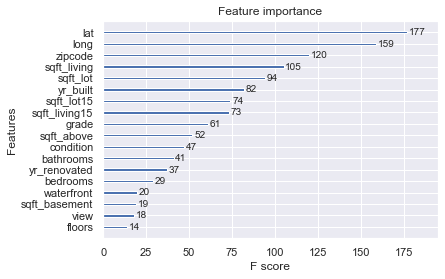

In [34]:
xgb.plot_importance(bst)

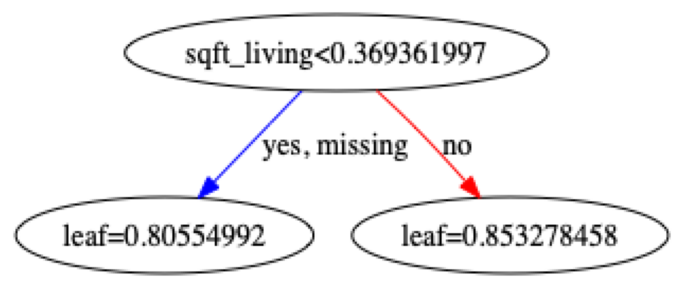

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_tree(bst,ax=ax,num_trees=4)

# Model Evaluation Using shap
- [official shap github repo](https://github.com/slundberg/shap)

In [36]:
import shap

In [37]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# explainer = shap.TreeExplainer(model_xgb)
# shap_values = explainer.shap_values(Xtest_scaled)
# # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 341: invalid start byte

In [39]:
# show_methods(model_xgb,4)

In [40]:
booster_model = model_xgb.get_booster()
booster_model.save_raw()[:10] # we need to remove string "binf"

bytearray(b'binf\x00\x00\x00?\x12\x00')

In [41]:
# https://github.com/slundberg/shap/issues/1215
model_bytearray = booster_model.save_raw()[4:]
booster_model.save_raw = lambda : model_bytearray

In [42]:
explainer = shap.TreeExplainer(booster_model)
shap_values = explainer.shap_values(Xtest_scaled)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [43]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:],
                df_Xtest_scaled.iloc[0,:],
                matplotlib=False,
                text_rotation=90)

In [44]:
# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, df_Xtest_scaled,matplotlib=False)

shap.force_plot is slow for many thousands of rows, try subsampling your data.


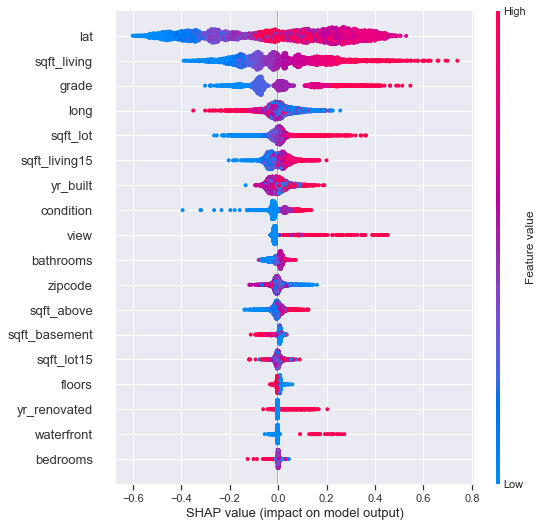

In [45]:
shap.summary_plot(shap_values, df_Xtest_scaled)

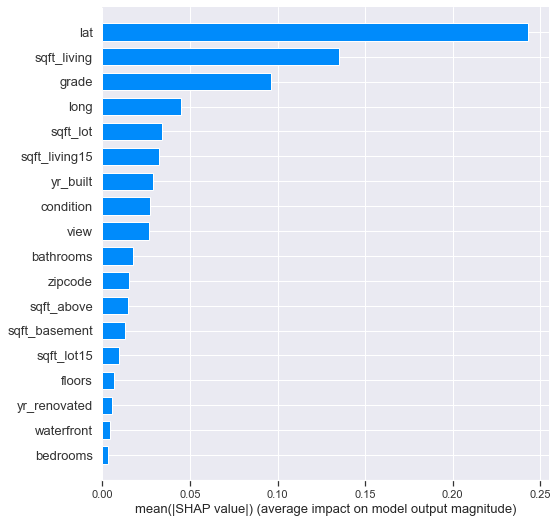

In [46]:
shap.summary_plot(shap_values, df_Xtest_scaled, plot_type='bar')

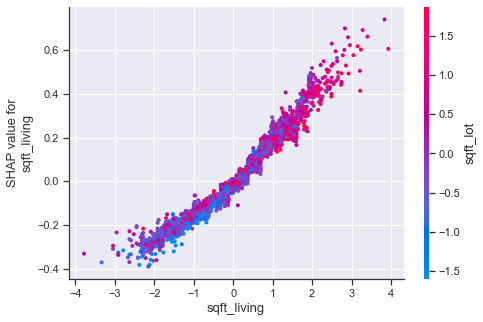

In [47]:
shap.dependence_plot("sqft_living", shap_values, df_Xtest_scaled)

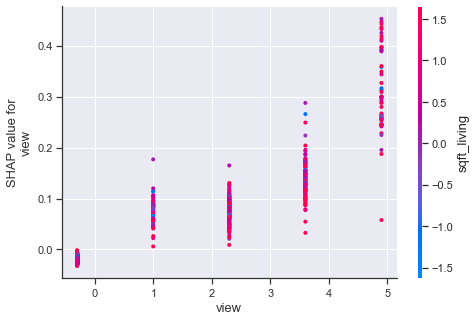

In [48]:
shap.dependence_plot("view", shap_values, df_Xtest_scaled)

# HPO (Hyper Parameter Optimization)

We generally should optimize model complexity and then tune the convergence.

model complexity: n_estimators, max_depth etc  
convergence: learning rate  

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.

Regularization parameters:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [49]:
# Baseline model

In [50]:
time_start = time.time()
# model fit
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror')

model_xgb.fit(df_Xtrain_scaled, ytrain)
default = """
ar2 = 0.8768138697750008
"""

# model_xgb.fit(df_Xtrain_scaled,ytrain,
#             eval_set=[(df_Xvalid_scaled,yvalid)],
#             eval_metric='rmse', # auc for classification
#             early_stopping_rounds=10, # early stopping gives
#             verbose = 50,
          
#             )
# early30 = """
# ar2 = 0.8768138697750008

# """


# predictions
ypreds = model_xgb.predict(df_Xtest_scaled)

# when doing grid search, we don't need to log transform back target
# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
print(ar2)

0.9000318461475653


# HPO Model Complexity

In [51]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
n = 1200
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=n,
                        )

model_xgb.fit(df_Xtrain_scaled, ytrain)
ypreds = model_xgb.predict(df_Xtest_scaled)
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
print(n, round(ar2,4))

results = \
"""
1100 0.9084
1200 0.9088
1300 0.9086
1400 0.9087
1500 0.9086
1600 0.9087
1700 0.9086
1800 0.9084
1900 0.9082
2000 0.9081


1160 0.9087
1170 0.9087
1180 0.9087
1190 0.9088
1200 0.9088
1210 0.9087
1220 0.9087

"""

1200 0.8915


In [53]:
for n in np.arange(3,4):
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=n,
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print(n, round(ar2,4))

"""
1 0.8744
2 0.9031
3 0.9088
4 0.9078
5 0.9058
6 0.9045
7 0.9032
""";

3 0.9011


In [54]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [55]:
for n in [1]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=n,
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print(n, round(ar2,4))

"""
for n in np.geomspace(0.001,1,10)
0.0001 0.9083
0.0002782559402207126 0.9083
0.000774263682681127 0.9081
0.002154434690031882 0.9093
0.005994842503189409 0.9082
0.016681005372000592 0.9084
0.046415888336127774 0.908
0.12915496650148828 0.9093
0.3593813663804626 0.9095
1.0 0.9104

""";

1 0.9064


In [56]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [57]:
for n in np.arange(1): # 1,20
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=n,
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))

"""
np.geomspace(1,1000,10)
1.0 0.9104
2.1544 0.9098
4.6416 0.9101
10.0 0.9097
21.5443 0.9101
46.4159 0.909
100.0 0.9082
215.4435 0.9076
464.1589 0.9042
1000.0 0.9004

np.arange(1,20)
1 0.9104
2 0.9104
3 0.9098
4 0.9101
5 0.9111 ** best
6 0.9111
7 0.9097
8 0.9099
9 0.9099
10 0.9097
11 0.9105
12 0.9105
13 0.9101
14 0.9099
15 0.9093
16 0.9111
17 0.9103
18 0.9101
19 0.9101

""";

0 0.9042


In [58]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [59]:
for n in [1]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=n
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))


"""
np.geomspace(0.001,1,10)
0.001 0.8226
0.0022 0.8463
0.0046 0.8657
0.01 0.8738
0.0215 0.8885
0.0464 0.8963
0.1 0.9017
0.2154 0.904
0.4642 0.9085
1.0 0.9111

np.arange(0.8,1.0,0.02)
0.8 0.9093
0.82 0.911
0.84 0.9104
0.86 0.9096
0.88 0.9095
0.9 0.9103
0.92 0.91
0.94 0.9102
0.96 0.9097
0.98 0.9104

np.arange(0.98,1.0,0.001)
0.98 0.9104
0.981 0.9099
0.982 0.9102
0.983 0.9101
0.984 0.91
0.985 0.9099
0.986 0.9105
0.987 0.9098
0.988 0.9103
0.989 0.9107
0.99 0.9095
0.991 0.9101
0.992 0.9109
0.993 0.9101
0.994 0.9103
0.995 0.9105
0.996 0.9103
0.997 0.9103
0.998 0.9107
0.999 0.9104
1.0 0.9111
""";

1 0.9072


In [60]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [61]:
for n in [0]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=n
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))

"""
0.0 0.9111
0.1111 0.8972
0.2222 0.8903
0.3333 0.8871
0.4444 0.8829
0.5556 0.8804
0.6667 0.8787
0.7778 0.8775
0.8889 0.8758
1.0 0.8728
""";

0 0.9072


In [62]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [63]:
for n in [1]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=n,
                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))

"""
0.0 0.9111
0.1111 0.9111
0.2222 0.9111
0.3333 0.9111
0.4444 0.9111
0.5556 0.9111
0.6667 0.9111
0.7778 0.9111
0.8889 0.9111
1.0 0.9111

""";

1 0.9072


In [64]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=-1, num_parallel_tree=1,
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [65]:
for n in [1]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=1,
                          colsample_bytree=n

                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))

"""
0.0 0.8875
0.1111 0.9021
0.2222 0.9087
0.3333 0.9105
0.4444 0.9107
0.5556 0.9111
0.6667 0.9107
0.7778 0.9097
0.8889 0.9101
1.0 0.9111


0.9 0.9101
0.9111 0.9101
0.9222 0.9101
0.9333 0.9101
0.9444 0.9107
0.9556 0.9107
0.9667 0.9107
0.9778 0.9107
0.9889 0.9107
1.0 0.9111
""";

1 0.9072


In [66]:
for n in [0.1]:
    model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=1,
                          colsample_bytree=1,
                          learning_rate=n

                          )

    model_xgb.fit(df_Xtrain_scaled, ytrain)
    ypreds = model_xgb.predict(df_Xtest_scaled)
    r2 = sklearn.metrics.r2_score(ytest, ypreds)
    ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
    print( round(n,4), round(ar2,4))

"""
0.0001 -442.5797
0.001 -50.6359
0.1 0.9111
0.2 0.9086
0.3 0.9072
0.4 0.9036
""";

0.1 0.9111


In [67]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# params_grid = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
# }

                    
# model_xgb = xgb.XGBRegressor(learning_rate =0.1,
#                                  n_estimators=1000,
#                                  max_depth=5,
#                                  min_child_weight=1,
#                                  gamma=0,
#                                  subsample=0.8,
#                                  colsample_bytree=0.8,
#                                  n_jobs=-1,
#                                  scale_pos_weight=1,
#                                  seed=RANDOM_STATE)

# gsearch1 = GridSearchCV(estimator=model_xgb,
#                         param_grid=params_grid, 
#                         n_jobs=-1,
#                         iid=False, 
#                         verbose=10,
#                         scoring='neg_mean_squared_error')

# gsearch1.fit(Xtrain_scaled,ytrain)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

# Best Model

In [73]:
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=1200,
                        max_depth=3,
                        reg_alpha=1,
                        reg_lambda=5,
                        subsample=1,
                        gamma=0,
                        min_child_weight=1,
                        colsample_bytree=1,
                        learning_rate=0.1

                        )

model_xgb.fit(df_Xtrain_scaled, ytrain)
ypreds = model_xgb.predict(df_Xtest_scaled)

# NOTE: if we have log1p transform the target, we need to get it back
ytx_back = np.expm1(ytx)
ypreds_back = np.expm1(ypreds)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx_back,ypreds_back))

# expalined variance
evs = explained_variance_score(ytx_back, ypreds_back)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx_back, ypreds_back)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print(f"""
         RMSE     : {rmse:,.2f}
     R-Squared    : {r2:,.4f}
Adjusted R-squared: {ar2:,.4f}
    """)


         RMSE     : 113,391.69
     R-Squared    : 0.9046
Adjusted R-squared: 0.9042

    


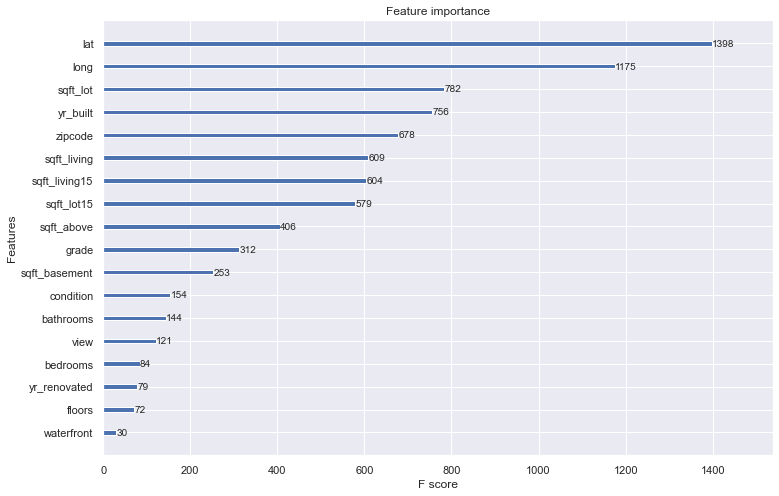

In [69]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model_xgb,ax=ax)
plt.show()

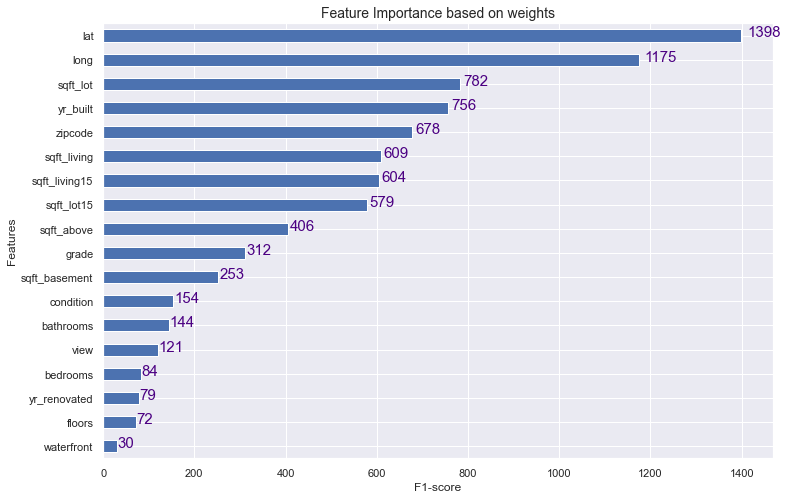

In [70]:
plot_feature_imp_xgb(model_xgb)

# Time Taken

In [71]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 2 min 52 secs
